# Preparação do notebook

In [1]:
# Código padrão para aumentar a largura do notebook

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# Pré processamento - base de treinamento

In [2]:
# Importação das bibliotecas e aumento da capacidade das colunas do Dataframe para conversão em string

from spacy.lang.pt.stop_words import STOP_WORDS
import unicodedata 
import re
import pandas as pd
import gensim
import spacy
import datetime as dt
from tqdm.notebook import tqdm
import winsound
import warnings

pd.set_option("display.max_colwidth", 1000)
nlp = spacy.load('pt_core_news_sm')
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# Edição de stopwords do Spacy

adj_pos = ['bom','delicioso','gostoso','saboroso','delicia','excelente','otimo','adoravel','agradavel','otima','irretocavel','boa','aprazivel','bem','favoravel','impecavel','maravilhoso','espetacular','top','melhor',
          'delicioso','gostoso','saboroso','delicia']
adj_neg = ['ruim','pessimo','horrivel','sofrivel','mal','terrivel','detestavel','mau','horroroso','pavoroso']
remove_from_stopwords = ['bom','boa','tarde','segunda','quarta','quinta','sexta','lugar','valor','maior','grande','menos','mais','menor','demais','custa']
add_to_stopwords = ['msm','brasilia','sao','cocar','bambu','lago','paranoa','sul','particularmente','obviamente','completamente','sequer', 'deixar',
                    'tao','pra','voce','principal','optar','ter','consideravel','self','service',
                    'feira','sendo','segunda','terça','quarta','quinta','sexta','sábado','domingo','dia','dias', 'função', 'funções', 'pelas',
                    'pois','entretanto','contudo','porque', 'por que', 'por quê', 'porquê', 'pára','me', 'pare', ' aparentemente', 'sim', 
                    'um','uns','coisa','oferece','poderia','ter','quase', 'fica','assim','porém','pois','pq','hj','tipo','ir', 'inventa', 'pelos',
                    'hs','msm','tbm','vc','dá','pra','veio','nessa','nisso','nesse','dessa','desse','deste','desta','diso', 'inventar', 'deixar',
                    'disso','pode','ser', 'aqui','acho','achei','algumas','algum','alguns', 'min','nesta','neste','acima', 'nada', 'alguém',
                    'pedi','pedimos','possui', 'bastante', 'como','deve', 'chegar', 'chama', 'chamar', ' volta', 'volto', 'voltar', 'desejar',
                    'deveria', 'se', 'dever', 'chega', 'coco', 'côco', 'Coco', 'Côco', 'Bambu', 'bambu', 'conseguir', 'eternamente', 'pede', 
                    'pedir', 'pediu', 'tudo', 'casa', 'última', 'último', 'carne', 'sol', 'nome', 'esquecer', 'esqueci', 'esqueceu', 'esquece',
                    'comer', 'comido', 'comeu', 'pessoa', 'ainda', 'peno', 'hipótese', 'durante', 'estar', 'fomos', 'em', 'estávamos', 'hora',
                    'esta', 'este', 'isto', 'isso', 'sente', 'sentiu', 'sentir', 'tentamos', 'almoçar', 'hipotese', 'começar', 'começa', 'melhor',
                    'nunca', 'contrário','um', 'uma','uns','umas', 'pela', 'pelo', 'fazer', 'fiz', 'fez', 'fui', 'for', 'certa', 'certo', 'optar',
                    'um', 'dois', 'tres', 'três', 'quatro', 'cinco', 'seis', 'sete', 'oito', 'nove', 'dez', 'onze', 'doze', 'treze', 'pessoas',
                    'noite', 'nenhuma', 'nenhum', 'várias', 'aniversário', 'Águas', 'Claras', 'Lago', 'Sul', 'haver', 'achar', 'achou', 'valeu',
                    'internacional', 'vida', 'tanto', 'grande', 'uma', 'umar', 'carnar', 'atenção', 'somente', 'após', 'toda', 'vez', 'todo',
                    'minuto', 'horas', 'minutos','segundo', 'segundos', 'horar', 'ora', 'parir', 'vezes', 'vezar','extremamente', 'nado', 'valer',
                    'ficar', 'varanda', 'notei', 'notar', 'principalmente', 'pelar', 'noto', 'nota', 'legal', 'colocar', 'coloca', 'coloco', 'colocou',
                    'recomendar', 'tando', 'causa', 'causar', 'gradar', 'sempre', 'gostar', 'casar', 'algo',
                    'de','a','o','que','e','do','da','em','um','para','é','com','não','uma','os','no','se',
                    'na','por','mais','as','dos','como','mas','foi','ao','ele','das','tem','à','seu','sua',
                    'ou','ser','quando','muito','há','nos','já','está','eu','também','só','pelo','pela','até',
                    'isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse',
                    'eles','estão','você','tinha','foram','essa','num','nem','suas','meu','às','minha','têm','numa',
                    'pelos','elas','havia','seja','qual','será','nós','tenho','lhe','deles','essas','esses','pelas',
                    'este','fosse','dele','tu','te','vocês','vos','lhes','meus','minhas','teu','tua','teus','tuas',
                    'nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles',
                    'aquelas','isto','aquilo','estou','está','estamos','estão','estive','esteve','estivemos','estiveram',
                    'estava','estávamos','estavam','estivera','estivéramos','esteja','estejamos','estejam','estivesse',
                    'estivéssemos','estivessem','estiver','estivermos','estiverem','hei','há','havemos','hão','houve',
                    'houvemos','houveram','houvera','houvéramos','haja','hajamos','hajam','houvesse','houvéssemos',
                    'houvessem','houver','houvermos','houverem','houverei','houverá','houveremos','houverão','houveria',
                    'houveríamos','houveriam','sou','somos','são','era','éramos','eram','fui','foi','fomos','foram','fora',
                    'fôramos','seja','sejamos','sejam','fosse','fôssemos','fossem','for','formos','forem','serei','será',
                    'seremos','serão','seria','seríamos','seriam','tenho','tem','temos','tém','tinha','tínhamos','tinham',
                    'tive','teve','tivemos','tiveram','tivera','tivéramos','tenha','tenhamos','tenham','tivesse','tivéssemos',
                    'tivessem','tiver','tivermos','tiverem','terei','terá','teremos','terão','teria','teríamos','teriam']
for word in remove_from_stopwords:
    nlp.Defaults.stop_words.remove(word)
for word in add_to_stopwords:
    nlp.Defaults.stop_words.add(word)

In [4]:
# Importação dos dados, criação de dataframe, conversão da coluna target em categórica e conversão em string (corpus)

df = pd.read_csv('C:/Users/Therthius/Desktop/comentarios.csv', dtype=str, sep = ',', encoding='utf-8')
df['Avaliacao'] = df['Avaliacao'].astype('category')
df_pos = df.loc[df['Avaliacao'] == '0'][:4053]
df_neg = df.loc[df['Avaliacao'] == '1']
texto = pd.Series.to_string(df_pos['Texto']).replace('...', ' ')

In [5]:
# Pré-processamento: remoção de caracteres especiais e stopwords, transformação em minúsculas e lemmatization

inicio = dt.datetime.now()

frases = [" ".join([token.lemma_ for token in nlp(" ".join(gensim.utils.simple_preprocess(re.sub('[^a-zA-Z0-9 \\\]', '', u"".join([c for c in unicodedata.normalize('NFKD', frase) \
 if not unicodedata.combining(c)]))))) if token.is_stop == False and len(token) > 2 ]) for frase in tqdm(texto.splitlines())]

duracao = dt.datetime.now()-inicio 

print('A duração do processamento foi de', str(duracao)[:str(duracao).find('.')]) 
winsound.PlaySound("SystemExclamation", winsound.SND_ALIAS)


A duração do processamento foi de 0:00:51


In [6]:
# Substituição de adjetivos equivalentes, para melhorar a uniformização dos bigramas

frases_adj = []

for frase in frases:
    teste = []
    for word in frase.split(" "):
        if word in adj_pos:
            teste.append('bom')
        elif word in adj_neg:
            teste.append('ruim')
        else:
            teste.append(word)
    frases_adj.append(" ".join(teste))
    
frases = frases_adj

In [7]:
# Formação de bigramas

bigramas_sep_coment = [[frase.split(" ")[i] + ' ' + frase.split(" ")[i+1] for i in range(0, len(frase.split(" "))-1)] for frase in tqdm(frases)]
bigramas_total = [w for i in tqdm(bigramas_sep_coment) for w in i]

In [8]:
# Criação de relação de bigramas com ordem única

inicio = dt.datetime.now()

bigramas_total_ordem = []
for bigrama in tqdm(bigramas_total):
    if bigrama in bigramas_total_ordem or bigrama.split(' ')[-1] + ' ' + bigrama.split(' ')[0] in bigramas_total_ordem: pass
    else:
         bigramas_total_ordem.append(bigrama)
            
duracao = dt.datetime.now()-inicio 

print('A duração do processamento foi de', str(duracao)[:str(duracao).find('.')]) 
winsound.PlaySound("SystemExclamation", winsound.SND_ALIAS)


A duração do processamento foi de 0:00:06


In [9]:
# Ajuste em relação a ordem das palavras em cada bigrama dentro de cada comentário

bigramas_sep_coment_ordem = []

inicio = dt.datetime.now()

for i in tqdm(bigramas_sep_coment):
    lista=[]
    for w in i:
        if w in bigramas_total_ordem:
            lista.append(w)
        elif w.split(' ')[-1] + ' ' + w.split(' ')[0] not in lista:
            lista.append(w.split(' ')[-1] + ' ' + w.split(' ')[0])
    bigramas_sep_coment_ordem.append(lista)
    
duracao = dt.datetime.now()-inicio 

print('A duração do processamento foi de', str(duracao)[:str(duracao).find('.')]) 
winsound.PlaySound("SystemExclamation", winsound.SND_ALIAS)


A duração do processamento foi de 0:00:05


In [10]:
# Criação de dicionários e conversão em corpus

inicio = dt.datetime.now()

dictionary = gensim.corpora.Dictionary(bigramas_sep_coment_ordem)
corpus = [dictionary.doc2bow(doc) for doc in bigramas_sep_coment_ordem]

duracao = dt.datetime.now()-inicio 

print('A duração do processamento foi de', str(duracao)[:str(duracao).find('.')]) 
winsound.PlaySound("SystemExclamation", winsound.SND_ALIAS)

A duração do processamento foi de 0:00:00


In [11]:
# Definição de função para cálculo de coerência de modelos com diferentes hiperparâmetros

def compute_coherence_values(corpus, dictionary, k):
    np.random.seed(2018)
    lda_model = gensim.models.LdaMulticore(corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=40,
                                           passes=5,
                                           eval_every=1,
                                           alpha='symmetric',
                                           iterations=5,
                                           per_word_topics=True,
                                           workers=7)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=bigramas_sep_coment_ordem, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [12]:
# Cálculo de coerências com diferentes hiperparâmetros
import numpy as np
import tqdm 
from gensim.models import CoherenceModel

inicio = dt.datetime.now()

np.random.seed(2018)

min_topics = 5
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {'Topics': [], 'Coherence': []}
pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:
  cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k)
  model_results['Topics'].append(k)
  model_results['Coherence'].append(cv)
  pbar.update(1)
pbar.close()

duracao = dt.datetime.now()-inicio 

print('A duração do processamento foi de', str(duracao)[:str(duracao).find('.')]) 
winsound.PlaySound("SystemExclamation", winsound.SND_ALIAS)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:39<00:00, 27.91s/it]


A duração do processamento foi de 0:04:39


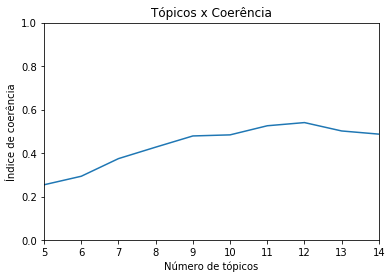

Número de tópicos: 	 Índice de coerência: 

	 5 	 	 	 0.255
	 6 	 	 	 0.295
	 7 	 	 	 0.376
	 8 	 	 	 0.428
	 9 	 	 	 0.480
	 10 	 	 	 0.485
	 11 	 	 	 0.527
	 12 	 	 	 0.541
	 13 	 	 	 0.503
	 14 	 	 	 0.488


In [13]:
# Plotagem de coerência x número de tópicos

import matplotlib.pyplot as plt 
%matplotlib inline

x = model_results['Topics']
y = model_results['Coherence']
plt.ylim(0,1)
plt.xlim(5,14)
plt.plot(x, y) 
plt.xlabel('Número de tópicos') 
plt.ylabel('Índice de coerência') 
plt.title('Tópicos x Coerência') 
plt.show() 

print('Número de tópicos: \t Índice de coerência: \n')
for i in range(0,len(model_results['Topics'])):
    print('\t {} \t \t \t {:04.3f}' .format(model_results['Topics'][i], model_results['Coherence'][i]))

In [14]:
# Indicação de seed e geração do modelo com 18 tópicos

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus,
                                           id2word=dictionary,
                                           num_topics=         12, 
                                           random_state=100,
                                           chunksize=40,
                                           passes=5,
                                           eval_every=1,
                                           alpha='symmetric',
                                           iterations=5,
                                           per_word_topics=True,
                                           workers=7)

In [15]:
# Cálculo de coerência do modelo com 12 tópicos

coherence_model_lda = CoherenceModel(model=lda_model, texts=bigramas_sep_coment_ordem, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Índice de coerência: {:04.3f}' .format(coherence_lda))

Índice de coerência: 0.545


In [16]:
# Visualização do modelo gerado
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

B:\Python\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.360165  0.099869       1        1  41.249771
2      0.209369 -0.179316       2        1  17.944677
5     -0.010781  0.135092       3        1   7.579144
6     -0.025334 -0.015893       4        1   5.197978
10    -0.041187 -0.001059       5        1   4.702354
7     -0.063737 -0.000612       6        1   4.447481
9     -0.051476 -0.006355       7        1   4.202065
4     -0.054232 -0.013713       8        1   4.047775
0     -0.073714 -0.002142       9        1   3.631127
1     -0.083951 -0.006556      10        1   2.642868
3     -0.083664 -0.003163      11        1   2.282948
11    -0.081459 -0.006154      12        1   2.071811, topic_info=     Category         Freq                       Term        Total  loglift  \
80    Default   388.000000                 valer peno   388.000000  30.0000   
8     Default  1055.000000              ambientar bom  1055.000000  29.0000   
97    Default   545.000000               prato servir   545.000000  28.0000   
57    Default   654.000000                  fruto mar   654.000000  27.0000   
205   Default   136.000000          custar beneficiar   136.000000  26.0000   
0     Default  1706.000000            atendimento bom  1706.000000  25.0000   
38    Default   258.000000                camarao bom   258.000000  24.0000   
189   Default   126.000000              filar esperar   126.000000  23.0000   
164   Default   109.000000                  bom farto   109.000000  22.0000   
1     Default  1569.000000                 bom comido  1569.000000  21.0000   
203   Default    83.000000                 bom custar    83.000000  20.0000   
36    Default   662.000000                  bom prato   662.000000  19.0000   
116   Default   488.000000            bom restaurante   488.000000  18.0000   
100   Default   283.000000                 servir bom   283.000000  17.0000   
864   Default    61.000000                prato fruto    61.000000  16.0000   
158   Default    95.000000                 nao deixar    95.000000  15.0000   
136   Default   440.000000                    bom bom   440.000000  14.0000   
170   Default    96.000000                servir atar    96.000000  13.0000   
425   Default   116.000000                musicar bom   116.000000  12.0000   
2219  Default    45.000000                 bonito bom    45.000000  11.0000   
356   Default    75.000000               cartar vinho    75.000000  10.0000   
98    Default   178.000000               preco justar   178.000000   9.0000   
24    Default    40.000000           aconchegante bom    40.000000   8.0000   
28    Default   301.000000                  lugar bom   301.000000   7.0000   
421   Default    93.000000                farto prato    93.000000   6.0000   
2121  Default    31.000000      restaurante ambientar    31.000000   5.0000   
26    Default   328.000000                  bom visto   328.000000   4.0000   
213   Default    81.000000          prato atendimento    81.000000   3.0000   
130   Default    69.000000                  bom valer    69.000000   2.0000   
2814  Default    41.000000         recomendar camarao    41.000000   1.0000   
...       ...          ...                        ...          ...      ...   
4962  Topic12     5.050311              bom culinaria     5.817903   3.7353   
2394  Topic12     5.213536              bom comemorar     6.007623   3.7350   
2842  Topic12     4.979281             prato elaborar     5.748403   3.7331   
75    Topic12     4.302233           reservar esperar     5.077185   3.7111   
1943  Topic12     4.114815             conhecer lugar     4.938807   3.6942   
4141  Topic12     3.783502            comemorar datar     4.550812   3.6921   
649   Topic12     3.451379           recomendar amigo     4.227930   3.6738   
560   Topic12     2.989053         camarao fantastico     3.757627   3.6479   
71    Topic12     2.881983         jantar